In [63]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("nbagg")   #подключить эти пакеты для анимации

In [64]:
Tlen = 10
dt = 0.0005  
nt = int(Tlen/dt)        # number of time steps
L = np.pi       # coordinate region
iplot = 1000

In [65]:
def fourier_derivative(f, dx):    
    nx = np.size(f)
    # Initialize k vector up to Nyquist wavenumber 
    kmax = np.pi / dx
    dk = kmax / (nx / 2)                                   # не до конца понимаю это место.
    k = np.arange(float(nx))                               # хотя сама делала что-то похожее с hstack
    k[: int(nx/2)] = k[: int(nx/2)] * dk 
    k[int(nx/2) :] = k[: int(nx/2)] - kmax
    
    # Fourier derivative
    ff = np.fft.fft(f)
    ff = (1j*k)*ff
    df_num = np.real(np.fft.ifft(ff)) 
    return df_num 

In [66]:
# функця плотности распределенич
def rho1(x, z):                          # функция работает как надо
    return np.e**(-(x**2+z**2)/2)*(2*np.pi)**(-1)
 

In [67]:
def H(f,p):
    return p**2/2 + f**2/2 
def F(f):
    return -f #-np.gradient(H(f,0)) - так было

In [82]:
n = 20 # число итераций
nxmax = 40
nxmin = 2
nxx = np.linspace(nxmin, nxmax, n) # количество точек должно быть четным!!!
el = []
nxx


array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26.,
       28., 30., 32., 34., 36., 38., 40.])

In [83]:
for m in nxx:
    
    nx = int(m)        # number of grid points in x 
    nz = nx         # number of grid points in z
    L = np.pi       # coordinate region
    dx = L/(nx-1)     # calculate space increment
    f  = np.linspace(-L/2,L/2, nx) # initialize space coordinates
    p  = np.linspace(-L/2,L/2, nz) # initialize space coordinates
 
    # initialization of pressure fields
 
    sp = np.zeros((nz, nx), dtype= float)
     
    sd2pp = np.zeros((nz, nx), dtype=float) # матрица для производной по p
    sd2pf = np.zeros((nz, nx), dtype=float) # матрица для производной по f
    beg = np.zeros((nx, nz), dtype= float) #матрица нулей для начального распределения
    for i in range(nx): #заполняем значениями функции в узлах
        for j in range(nz):
            beg[i,j] =  rho1(f[i], p[j])




    sp = beg #в нулевой момент времнени плотность равна НУ

    for it in range(nt):
   
        # ----------------------------------------
        # Fourier Pseudospectral Method
        # ----------------------------------------
        # space derivative
    
        for j in np.arange(nz):           
            sd2pp[:,j] = F(f)[j]*fourier_derivative(sp[:,j].T, dx) #F(f)[j]*fourier_derivative(sp[:,j].T, dx) #jй столбец, по p
        for i in np.arange(nx):           
            sd2pf[i,:] = p[i]*fourier_derivative(sp[i,:], dx) #p[i]*fourier_derivative(sp[i,:], dx) #iя ст рока, по q
   
        # Time Extrapolation
        sp = sp - dt*(sd2pp + sd2pf)    
    print(m)
    result = np.sum(np.abs(beg-sp))/m**2  # тут надо сумму делить на кол-во слагаемых. понятно, что чем меньше точек,   
    el.append([nx,result])                # тем меньше разность в них. как так можно было протупить?

2.0
4.0
6.0
8.0
10.0
12.0
14.0
16.0
18.0
20.0
22.0
24.0
26.0
28.0
30.0
32.0
34.0
36.0
38.0
40.0


<IPython.core.display.Javascript object>


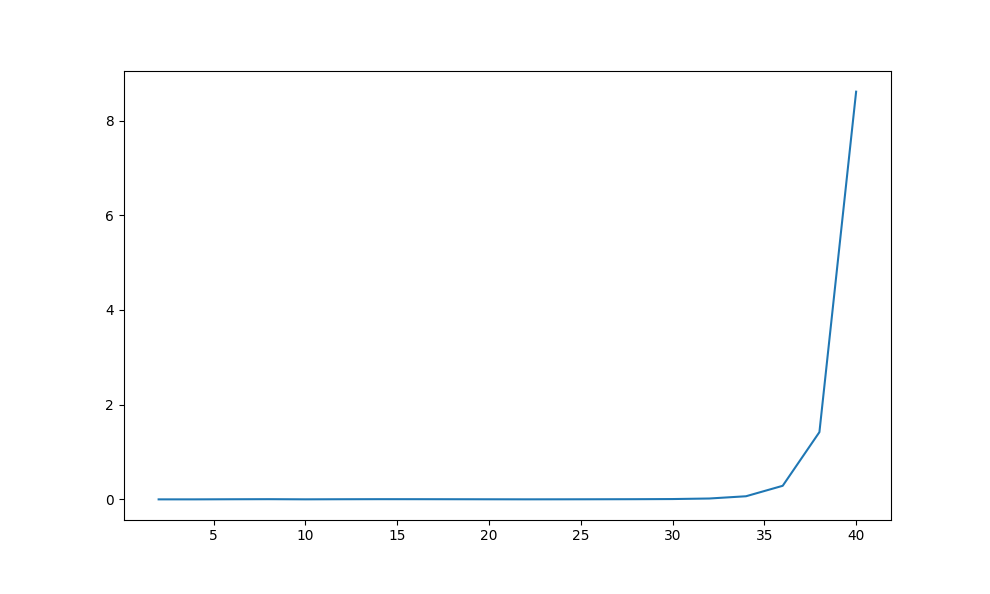

In [84]:
# зависимость метрики точности от шага
el = np.array(el)
fig = plt.figure(figsize=(10,6))
plt.plot(el[:,0],el[:,1])
plt.show()

<IPython.core.display.Javascript object>


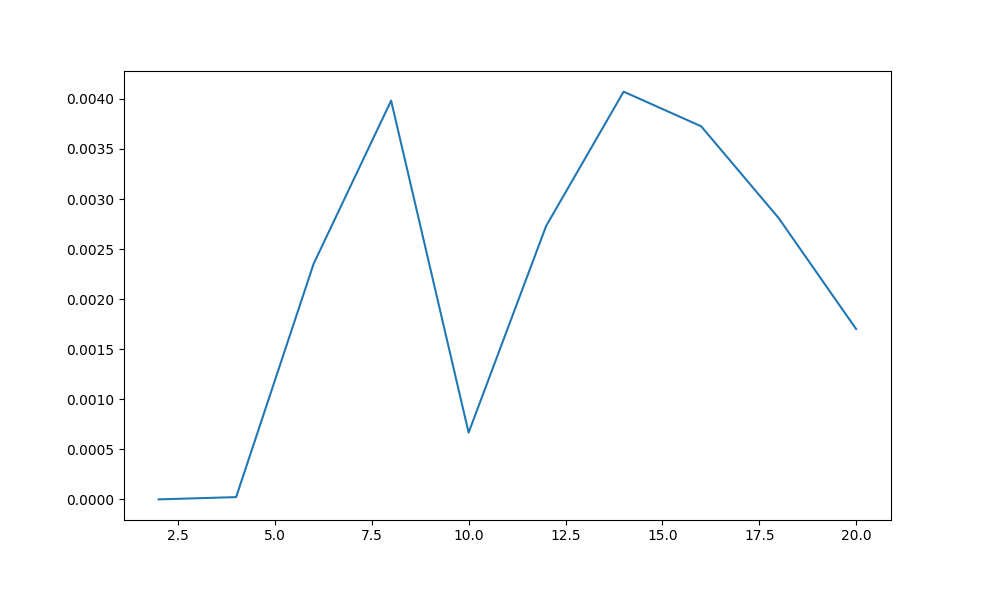

In [99]:
# зависимость метрики точности от шага 
el1=el[:10]
fig = plt.figure(figsize=(10,6))
plt.plot(el1[:,0],el1[:,1])
plt.show()

In [95]:
L/22

0.14279966607226333

<IPython.core.display.Javascript object>


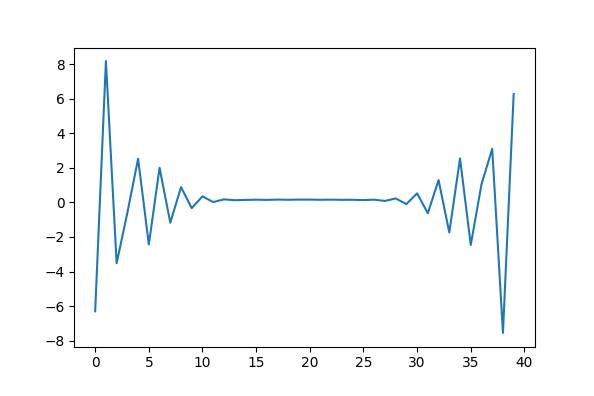

In [97]:
plt.plot(sp[:,int(m/2)])
plt.show()

In [80]:
L/20

0.15707963267948966